# Introduction to Deep Learning with Tensorflow
<br><br><br>

##  Carlos Segura 
<b>
## Associate Researcher @ TID

# What is Tensorflow?

* TensorFlow is a deep learning library
     * open-sourced by Google.
* TensorFlow provides primitives for
defining functions on tensors and
automatically computing their derivatives.

* Python library that can work with symbolic mathematical expressions
    * *Symbolic differentation*: symbolic graphs for computing gradients
* Optimized for multi-dimensional arrays, like numpy.ndarray
    * Tensors
* Same code can work in CPU or GPU

### Installing Tensorflow
* Requirements
    * OS: Linux, Mac OS X, Windows
    * Python: >= 2.7 || >= 3.5
* pip install tensorflow [tensorflow-gpu]
 

## Basic usage:

* Represent computations as graphs
* Execute graphs in the context of sessions
* Represent data as tensors
* Maintain state with Variables
* Use feeds and fetches to get data in and out of graph executions

In [1]:
## Graphs
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

In [2]:
#To actually multiply the matrices, and get the result of the multiplication, you must launch the graph in a session.
# Launch the default graph.
sess = tf.Session()

# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of three ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
result = sess.run(product)
print(result)
# ==> [[ 12.]]

# Close the Session when we're done.
sess.close()

[[ 12.]]


In [3]:
# Sessions should be closed to release resources.
# You can also enter a Session with a "with" block. 
# The Session closes automatically at the end of the with block.


with tf.Session() as sess:
  result = sess.run([product])
  print(result)

[array([[ 12.]], dtype=float32)]


In [4]:
#
with tf.Session() as sess:
  with tf.device("/gpu:0"): #/cpu:0 /gpu:0 /gpu:1 /gpu:2
    matrix1 = tf.constant([[3., 3.]])
    matrix2 = tf.constant([[2.],[2.]])
    product = tf.matmul(matrix1, matrix2)

In [5]:
# Create a Variable, that will be initialized to the scalar value 0.
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# Variables must be initialized by running an `init` Op after having
# launched the graph.  We first have to add the `init` Op to the graph.
init_op = tf.global_variables_initializer()

# Launch the graph and run the ops.
with tf.Session() as sess:
  # Run the 'init' op
  sess.run(init_op)
  # Print the initial value of 'state'
  print(sess.run(state))
  # Run the op that updates 'state' and print 'state'.
  for _ in range(3):
    sess.run(update)
    print(sess.run(state))


0
1
2
3


In [6]:
#Fetches:
input1 = tf.constant([3.0])
input2 = tf.constant([2.0])
input3 = tf.constant([5.0])
intermed = tf.add(input2, input3)
mul = input1 * intermed

with tf.Session() as sess:
  result = sess.run([mul, intermed])
  print(result)


[array([ 21.], dtype=float32), array([ 7.], dtype=float32)]


In [7]:
#Feeds
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = input1 * input2

with tf.Session() as sess:
  print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

[array([ 14.], dtype=float32)]


## Linear Regression example

<img src="http://www.atmos.washington.edu/~robwood/teaching/451/labs/images/concepts12.jpg">

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


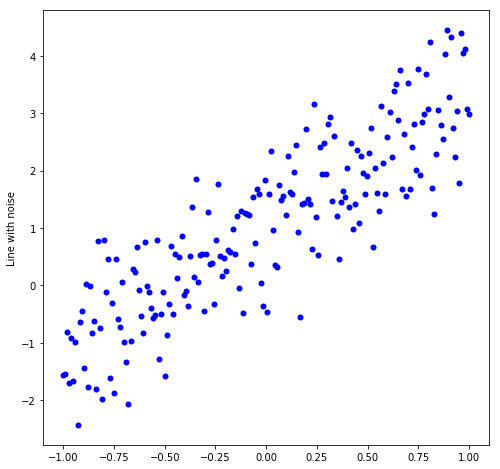

In [8]:
%reset
import numpy as np
trainX = np.linspace(-1,1, 200 )
trainY = (2 * trainX + 1.0 + np.random.randn(*trainX.shape)*0.8)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(8, 8))
plt.plot(trainX, trainY, 'bo', markeredgecolor='none')
plt.ylabel('Line with noise')
plt.show()

In [9]:
import tensorflow as tf


X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

prediction = X*w + b
loss = tf.reduce_mean(tf.pow(prediction-Y, 2))

var_grads = tf.gradients(loss, [w,b])

learning_rate = tf.constant(0.3)

new_w =  w - var_grads[0] * learning_rate 
new_b =  b - var_grads[1] * learning_rate

update_w = tf.assign(w, new_w)
update_b = tf.assign(b, new_b)

init_op = tf.global_variables_initializer()





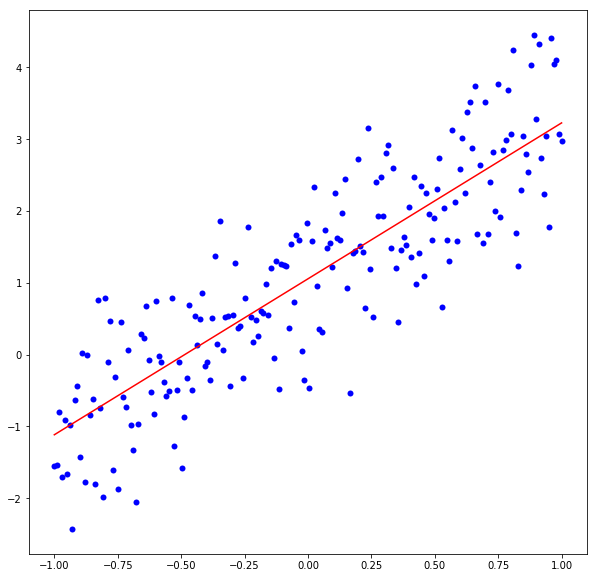

Cost:  0.573742  w: [2.1729417]  b: [1.0545049]


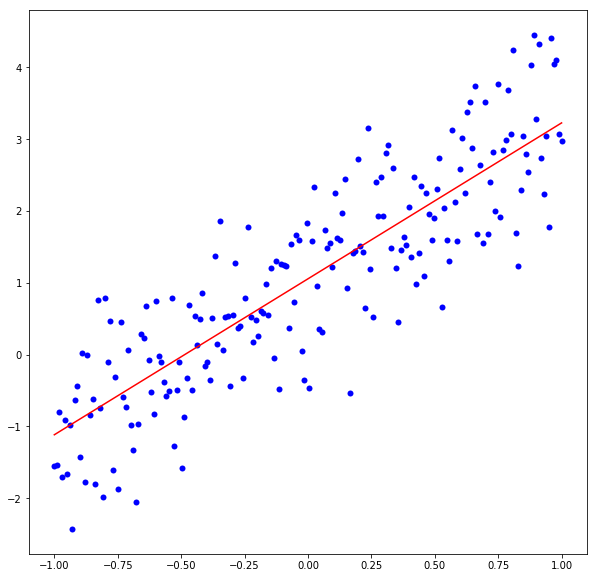

In [10]:
%matplotlib inline
import time
import pylab as plt
from IPython import display

fig = plt.figure( figsize=(10, 10))
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in range(15):
        [current_loss, _, _ ] = sess.run(
                [loss, update_w, update_b ], 
                feed_dict={X:trainX, Y:trainY})
        current_w = sess.run([w])
        current_b = sess.run([b])
        

        plt.clf()
        plt.plot(trainX, trainY,'o',color='b', markeredgecolor='none')
        plt.plot(trainX, trainX*current_w + current_b, color='r',)
        print('Cost: ', current_loss,' w:',current_w, ' b:',current_b)
        display.clear_output(wait=True)
        display.display(plt.gcf())

print('Cost: ', current_loss,' w:',current_w, ' b:',current_b)

## CNN example with MNIST

Dataset of images of handwritten digits like these

<div style="width: 400px">
![esto puede in en el style float:left;](https://www.tensorflow.org/images/MNIST.png)
</div>
 Each image is 28 pixels by 28 pixels. Can be interpreted as a matrix:
<div style="width: 200px">
![MNIST Pixels](https://www.tensorflow.org/images/MNIST-Matrix.png)
</div>

<div style="float:left;width: 400px">
![train ](https://www.tensorflow.org/images/mnist-train-xs.png)
</div>

<div style="float:right;width: 500px">
![1hot labels ](https://www.tensorflow.org/images/mnist-train-ys.png)
</div>
<br><br><br><br><br><br><br><br><br>
Images are = [55000, 28 ,28]    
reshaped into [5500, 784]         

Labels are [55000, 10]
(One-hot encoding of classes)


In [1]:
%reset
import argparse
import sys
import os
import time
import datetime

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data



mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [2]:
class MNIST_CNN():
    """
    A network for a classifier of digit images.
    Input are 2D grayscale images reshaped into a vector, and the labels in one-hot encoding
    Uses 2 Conv Layers, 1 hidden layer and softmax layer.
    """
    def __init__(self, img_length, hidden_layer_size = 256, num_classes=10):
        self.input_x = tf.placeholder(tf.float32, 
                            [None, img_length], name="input_x")
        self.input_y = tf.placeholder(tf.float32, 
                            [None, num_classes], name="input_y")

        # Input Layer
        # Dimesnions are [batch_size, image_width, image_height, channels]
        self.input_layer = tf.reshape(self.input_x, [-1, 28, 28, 1]) 


        # Convolutional Layer #1
        with tf.name_scope("Conv_1"):
            W=tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1), name="W")
            b = tf.Variable(tf.constant(0.1, shape=[32]), name="b")
            conv_out = tf.nn.conv2d(self.input_layer, W, 
                                 strides=[1, 1, 1, 1], padding='SAME') 
            self.conv1 = tf.nn.relu(conv_out + b)
            self.pool1 = tf.nn.max_pool(self.conv1, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

            
            #self.conv1 = tf.layers.conv2d(
            #      inputs=self.input_layer,
            #      filters=32,
            #      kernel_size=[5, 5],
            #      padding="same",
            #      activation=tf.nn.relu)
            # Pooling Layer #1
            #self.pool1 = tf.layers.max_pooling2d(inputs=self.conv1, pool_size=[2, 2], strides=2)

        # Convolutional Layer #2 and Pooling Layer #2
        with tf.name_scope("Conv_2"):
            W=tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1), name="W")
            b = tf.Variable(tf.constant(0.1, shape=[64]), name="b")
            
            conv_out = tf.nn.conv2d(self.pool1, W, 
                                 strides=[1, 1, 1, 1], padding='SAME') 
            self.conv2 = tf.nn.relu(conv_out + b)
            self.pool2 = tf.nn.max_pool(self.conv2, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

            #self.conv2 = tf.layers.conv2d(
            #      inputs=self.pool1,
            #      filters=64,
            #      kernel_size=[5, 5],
            #      padding="same",
            #      activation=tf.nn.relu)
            #self.pool2 = tf.layers.max_pooling2d(inputs=self.conv2, pool_size=[2, 2], strides=2)

        #Flat feature maps
        self.pool2_flat = tf.reshape(self.pool2, [-1, 7 * 7 * 64])

        # Dense Layer
        with tf.name_scope("hidden_layer_1"):
            W = tf.Variable(tf.truncated_normal([7 * 7 * 64, hidden_layer_size], stddev=0.1), name="W")
            b = tf.Variable(tf.constant(0.1, shape=[hidden_layer_size]), name="b")
            hl1 = tf.nn.relu ( tf.matmul(self.pool2_flat, W) + b )
            #dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)



        with tf.name_scope("softmax_layer"):
            W = tf.Variable(tf.truncated_normal([hidden_layer_size, num_classes], stddev=0.1), name="W")
            b = tf.Variable(tf.constant(0.1, shape=[num_classes]), name="b")
            self.scores = tf.nn.xw_plus_b(hl1, W, b, name="scores")
            self.predictions = tf.argmax(self.scores, 1, name="predictions")


        # CalculateMean cross-entropy loss
        with tf.name_scope("loss"):
            losses = tf.nn.softmax_cross_entropy_with_logits(logits=self.scores, labels=self.input_y)
            self.loss = tf.reduce_mean(losses)

        # Accuracy
        with tf.name_scope("accuracy"):
            correct_predictions = tf.equal(self.predictions, tf.argmax(self.input_y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")



In [3]:
#sess = tf.Session()
sess = tf.InteractiveSession() #for running inside notebook

mnist_dnn = MNIST_CNN(img_length=784, hidden_layer_size = 512, num_classes=10)

# Define Training procedure
global_step = tf.Variable(0, name="global_step", trainable=False)
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(mnist_dnn.loss, global_step=global_step)


In [4]:
timestamp = str(int(time.time()))
out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
print("Writing to {}\n".format(out_dir))

# Summaries for loss and accuracy
loss_summary = tf.summary.scalar("loss", mnist_dnn.loss)
acc_summary = tf.summary.scalar("accuracy", mnist_dnn.accuracy)


with tf.name_scope('var_summary'):
    for var in tf.trainable_variables():
        with tf.name_scope(var.name.split(':')[0]):
            print(var.name)
            if var.name.startswith("counter"):
                continue
            mean = tf.reduce_mean(var)
            tf.summary.scalar('mean', mean)
            with tf.name_scope('stddev'):
                stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('stddev', stddev)
            tf.summary.scalar('max', tf.reduce_max(var))
            tf.summary.scalar('min', tf.reduce_min(var))
            tf.summary.histogram('histogram', var)

# Train Summaries
#train_summary_op = tf.summary.merge([loss_summary, acc_summary ])
train_summary_op = tf.summary.merge_all()
train_summary_dir = os.path.join(out_dir, "summaries", "train")
train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)


Writing to /home/csegura/repo/deeplearning-tutorials/intro_tensorflow/runs/1490785825

Conv_1/W:0
Conv_1/b:0
Conv_2/W:0
Conv_2/b:0
hidden_layer_1/W:0
hidden_layer_1/b:0
softmax_layer/W:0
softmax_layer/b:0


In [5]:
checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
checkpoint_prefix = os.path.join(train_summary_dir, "model")
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
saver = tf.train.Saver(tf.global_variables(), max_to_keep=5)

In [ ]:
sess.run(tf.global_variables_initializer())


# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    feed_dict={mnist_dnn.input_x: batch_xs, mnist_dnn.input_y: batch_ys}
    _, step, summaries, loss, accuracy = sess.run([train_op, global_step, train_summary_op, mnist_dnn.loss, mnist_dnn.accuracy],  feed_dict)

    time_str = datetime.datetime.now().isoformat()
    print("{}: step {}, loss {:g}, acc {:g}".format(time_str, step, loss, accuracy))
    train_summary_writer.add_summary(summaries, step)

# Test trained model
print("Test accuracy")
print(sess.run(mnist_dnn.accuracy, feed_dict={mnist_dnn.input_x: mnist.test.images,
                                  mnist_dnn.input_y: mnist.test.labels}))


2017-03-29T13:10:39.881866: step 1, loss 8.95418, acc 0.11
2017-03-29T13:10:40.015714: step 2, loss 2770.34, acc 0.13
2017-03-29T13:10:40.149256: step 3, loss 198.7, acc 0.06
2017-03-29T13:10:40.285744: step 4, loss 4.43108, acc 0.09
2017-03-29T13:10:40.422569: step 5, loss 2.45084, acc 0.08
2017-03-29T13:10:40.559315: step 6, loss 2.29757, acc 0.14
2017-03-29T13:10:40.695132: step 7, loss 2.34409, acc 0.07
2017-03-29T13:10:40.831696: step 8, loss 2.35189, acc 0.06
2017-03-29T13:10:40.967529: step 9, loss 2.33049, acc 0.14
2017-03-29T13:10:41.104423: step 10, loss 2.30679, acc 0.1
2017-03-29T13:10:41.240034: step 11, loss 2.31062, acc 0.08
2017-03-29T13:10:41.377064: step 12, loss 2.32445, acc 0.11
2017-03-29T13:10:41.513868: step 13, loss 2.32875, acc 0.09
2017-03-29T13:10:41.651140: step 14, loss 2.30469, acc 0.12
2017-03-29T13:10:41.788677: step 15, loss 2.31508, acc 0.11
2017-03-29T13:10:41.926515: step 16, loss 2.30207, acc 0.12
2017-03-29T13:10:42.062774: step 17, loss 2.31645, a